<a href="https://colab.research.google.com/github/archie46/Deep-Learning-Lab/blob/main/Lab5_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget -O dog.jpg "https://cdn.britannica.com/79/232779-050-6B0411D7/German-Shepherd-dog-Alsatian.jpg"

--2023-09-22 10:51:59--  https://cdn.britannica.com/79/232779-050-6B0411D7/German-Shepherd-dog-Alsatian.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 18.164.154.38, 18.164.154.6, 18.164.154.49, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|18.164.154.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344524 (336K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>] 336.45K  1.58MB/s    in 0.2s    

2023-09-22 10:52:00 (1.58 MB/s) - ‘dog.jpg’ saved [344524/344524]



In [ ]:
image = cv2.imread('dog.jpg', cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale for edge detection

In [ ]:
# Apply Gaussian smoothing to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny edge detection
edges_canny = cv2.Canny(blurred, threshold1=30, threshold2=100)

In [ ]:
# Apply Sobel operator for edge detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
magnitude_sobel = np.sqrt(sobel_x**2 + sobel_y**2)
edges_sobel = np.uint8(magnitude_sobel)

In [ ]:
# Define Harris Corner Detection parameters
block_size = 2
ksize = 3
k = 0.04

# Apply Harris Corner Detection
corners = cv2.cornerHarris(image, block_size, ksize, k)

# Threshold and mark the corners on the original image
image_with_corners = image.copy()
image_with_corners[corners > 0.01 * corners.max()] = 0  # Adjust the threshold as needed

In [ ]:
# Apply Hough Line Transform
lines = cv2.HoughLines(edges_canny, 1, np.pi / 180, threshold=100)

# Draw detected lines on a copy of the original image
image_with_lines = image.copy()
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Apply Hough Circle Transform for circle detection (optional)
circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(image_with_lines, center, radius, (0, 255, 0), 2)


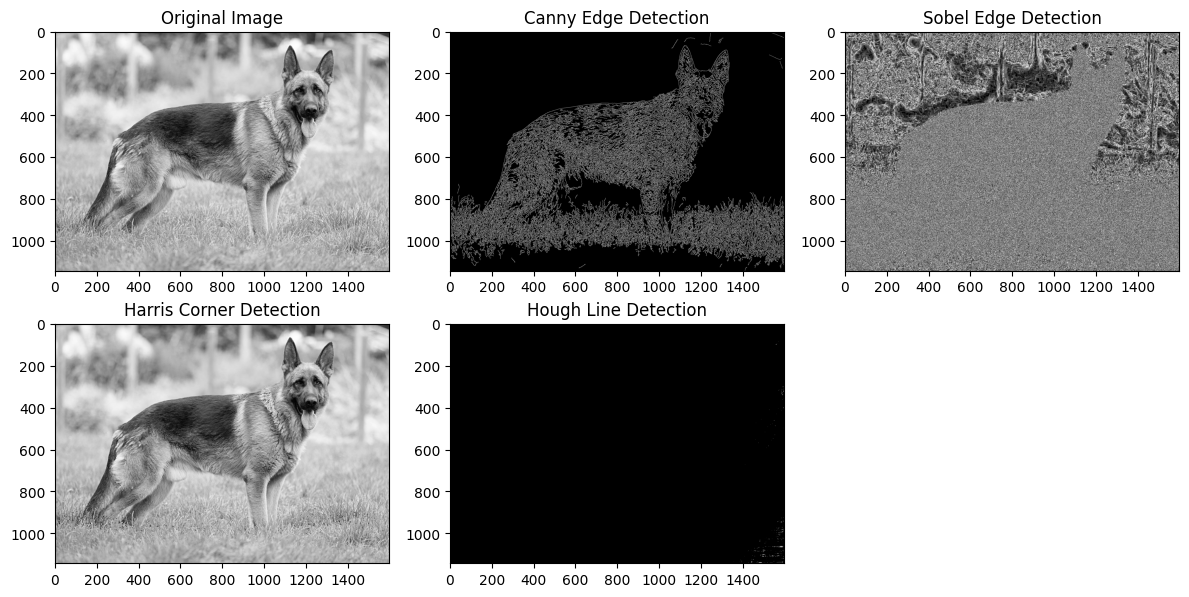

In [ ]:
# Create a subplot for each result
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title("Canny Edge Detection")
plt.imshow(edges_canny, cmap='gray')

plt.subplot(2, 3, 3)
plt.title("Sobel Edge Detection")
plt.imshow(edges_sobel, cmap='gray')

plt.subplot(2, 3, 4)
plt.title("Harris Corner Detection")
plt.imshow(image_with_corners, cmap='gray')

plt.subplot(2, 3, 5)
plt.title("Hough Line Detection")
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()